In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-09-25 09:10:15--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.5’

housing.csv.5       100%[===================>]   1.36M  5.15MB/s    in 0.3s    

2022-09-25 09:10:15 (5.15 MB/s) - ‘housing.csv.5’ saved [1423529/1423529]



In [3]:
df = pd.read_csv('housing.csv.2')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.fillna(0, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df['rooms_per_household'] = df['total_rooms'] / df['households']

In [9]:
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

In [10]:
df['population_per_household'] = df['population'] / df['households']

### Question 1

What is the most frequent observation (mode) for the column ocean_proximity?

#### Options:

NEAR BAY

**<1H OCEAN**

INLAND

NEAR OCEAN

In [11]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Split the data

Split your data in train/val/test sets, with 60%/20%/20% distribution.
Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
Make sure that the target value (median_house_value) is not in your dataframe.

In [12]:
data_no_target = df.drop('median_house_value', axis=1)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df_train_full, df_test = train_test_split(data_no_target, test_size=0.2, random_state=42)

In [15]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

### Question 2

Create the correlation matrix for the numerical features of your train dataset.
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
What are the two features that have the biggest correlation in this dataset?

#### Options:

**total_bedrooms and households**

total_bedrooms and total_rooms

population and households

population_per_household and total_rooms

In [16]:
data_numeric = df.copy()
data_numeric = df.drop(["ocean_proximity"], axis=1)
data_numeric.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,532.476211,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.210902,3.070655
std,2.003532,2.135952,12.585558,2181.615252,422.678333,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.061473,10.386050
min,-124.350000,32.540000,1.000000,2.000000,0.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.000000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.174539,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.202626,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239273,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


In [17]:
data_numeric.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068082,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.084836,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.065318,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.104112,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.125396,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,0.134153,0.133798,-0.174583,-0.024581
total_bedrooms,0.068082,-0.065318,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295,0.049148,0.002717,0.122205,-0.028019
population,0.099773,-0.108785,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.031397,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,0.065843,-0.080598,0.059818,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000,0.688075,0.326895,-0.573836,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049148,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.238759,-0.023737
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.002717,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.387465,-0.004852


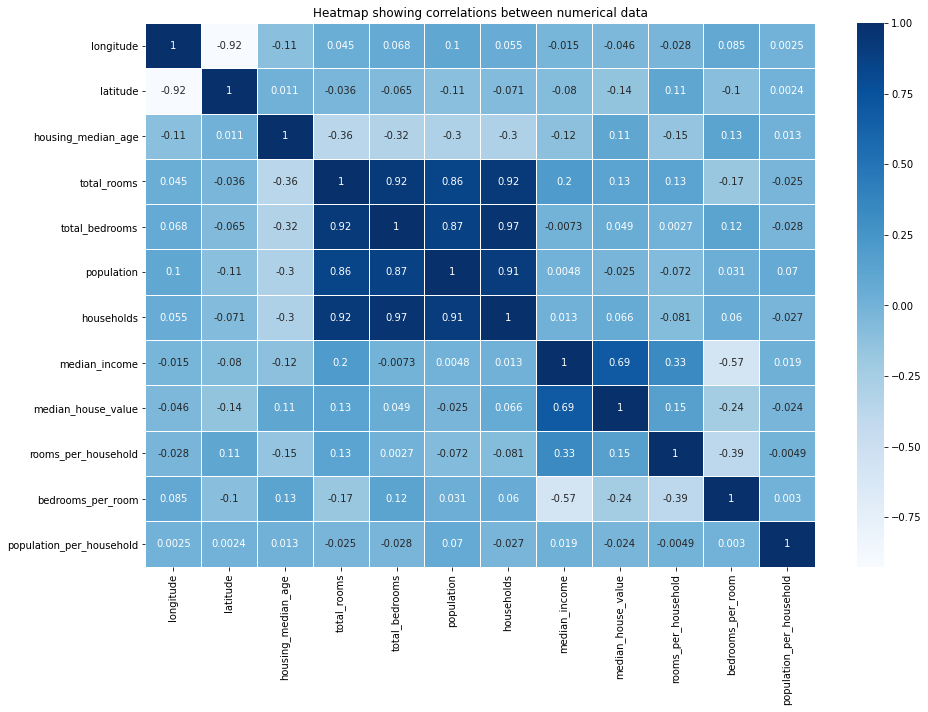

In [18]:
plt.figure(figsize=(15,10))  
sns.heatmap(data_numeric.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

### Make median_house_value binary

We need to turn the median_house_value variable from numeric into binary.
Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

In [19]:
pr_mean = df['median_house_value'].mean()

In [20]:
df_bin = df.copy()

In [21]:
df_bin['above_average'] = df_bin['median_house_value'].apply(lambda x: 1 if x > pr_mean else 0)

In [22]:
df_bin.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,1


### Question 3

Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
What is the value of mutual information?
Round it to 2 decimal digits using round(score, 2)

#### Options:

0.26

0

**0.10**

0.16

In [23]:
df_train_full_bin, df_test_bin = train_test_split(df_bin, test_size=0.2, random_state=42)

In [24]:
df_train_bin, df_val_bin = train_test_split(df_train_full_bin, test_size=0.25, random_state=42)

In [25]:
from sklearn.metrics import mutual_info_score

In [26]:
round(mutual_info_score(df_train_bin.above_average, df_train_bin.ocean_proximity), 2)

0.1

### Question 4

Now let's train a logistic regression
Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
Fit the model on the training dataset.
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

#### Options:

0.60

0.72

**0.84**

0.95

In [27]:
df2 = pd.get_dummies(df)

In [28]:
df2['above_average'] = df_bin['median_house_value'].apply(lambda x: 1 if x > pr_mean else 0)

In [30]:
del df2['median_house_value']

In [31]:
df_train_full, df_test = train_test_split(df2, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df2, test_size=0.25, random_state=42)

In [32]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [33]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [34]:
X_train = df_train.values
X_val = df_val.values
X_test = df_test.values

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
y_pred = model.predict(X_val)

score = accuracy_score(y_val,y_pred)

In [40]:
score.round(2)

0.84

### Question 5

Let's find the least useful feature using the feature elimination technique.
Train a model with all these features (using the same parameters as in Q4).
Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

total_rooms

total_bedrooms

population

**households**

In [58]:
def feature_importance(f_list):
    df_features = df2[f_list]
    df_train_full_f, df_test_f = train_test_split(df_features, test_size=0.2, random_state=42)
    df_train_f, df_val_f = train_test_split(df_features, test_size=0.25, random_state=42)
    del df_train_f['above_average']
    del df_val_f['above_average']
    del df_test_f['above_average']
    X_train = df_train_f.values
    X_val = df_val_f.values
    X_test = df_test_f.values
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    score = accuracy_score(y_val,y_pred)
    return score

In [59]:
f_list = ['total_rooms', 'total_bedrooms', 'population', 'households', 'above_average']
feature_importance(f_list)

0.6998062015503876

In [60]:
f_list = ['total_bedrooms', 'population', 'households', 'above_average']
feature_importance(f_list)

0.6143410852713178

In [63]:
f_list = ['total_rooms', 'population', 'households', 'above_average']
feature_importance(f_list)

0.6532945736434108

In [64]:
f_list = ['total_rooms', 'total_bedrooms', 'households', 'above_average']
feature_importance(f_list)

0.642829457364341

In [65]:
f_list = ['total_rooms', 'total_bedrooms', 'population', 'above_average']
feature_importance(f_list)

0.671124031007752

### Question 6

For this question, we'll see how to use a linear regression model from Scikit-Learn
We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.
If there are multiple options, select the smallest alpha.

#### Options:

0

0.01

0.1

1

10

In [121]:
df3 = pd.get_dummies(df)

In [122]:
df3['log_median_house_value'] = np.log(df3['median_house_value'])

In [123]:
del df3['median_house_value']

In [124]:
from sklearn import linear_model

In [125]:
def rmse(y, y_pred):
    se = error = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [126]:
def fit_ridge(a):
    df_train_full_f, df_test_f = train_test_split(df3, test_size=0.2, random_state=42)
    df_train_f, df_val_f = train_test_split(df3, test_size=0.25, random_state=42)
    
    y_train = df_train_f.log_median_house_value.values
    y_val = df_val_f.log_median_house_value.values
    y_test = df_test_f.log_median_house_value.values
    
    del df_train_f['log_median_house_value']
    del df_val_f['log_median_house_value']
    del df_test_f['log_median_house_value']
    
    X_train = df_train_f.values
    X_val = df_val_f.values
    X_test = df_test_f.values
    
    model = linear_model.Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    score = rmse(y_val, y_pred)
    
    return score.round(3)

In [127]:
for i in [0, 0.01, 0.1, 1, 10]:
    print(fit_ridge(i), i)

0.555 0
0.555 0.01
0.555 0.1
0.555 1
0.555 10
